In [2]:
import requests
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import json
import pickle

In [9]:
api_url = "http://127.0.0.1:5000/api/v1.0/demographic_data_2022_budget"

response = requests.get(api_url)

demographic_data = response.json()

demographic_df = pd.DataFrame(demographic_data)

desired_columns = [
    'Average total income in 2020 among recipients ($)',
    'Median total income in 2020 among recipients ($)',
    '2022 Budget',
    'Population density per square kilometre',
    'Ward'
]

demographic_df = demographic_df[desired_columns]

demographic_df.head()


,Average total income in 2020 among recipients ($),Median total income in 2020 among recipients ($),2022 Budget,Population density per square kilometre,Ward
0,69500,44000,1137.0,6531.2,Beaches-East York
1,55550,40400,8957.0,8769.1,Davenport
2,113600,47600,1535.0,3386.0,Don Valley West
3,59750,40800,48033.2,20546.5,Toronto Centre
4,55050,37200,12145.0,5984.4,Willowdale


C:\Users\jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

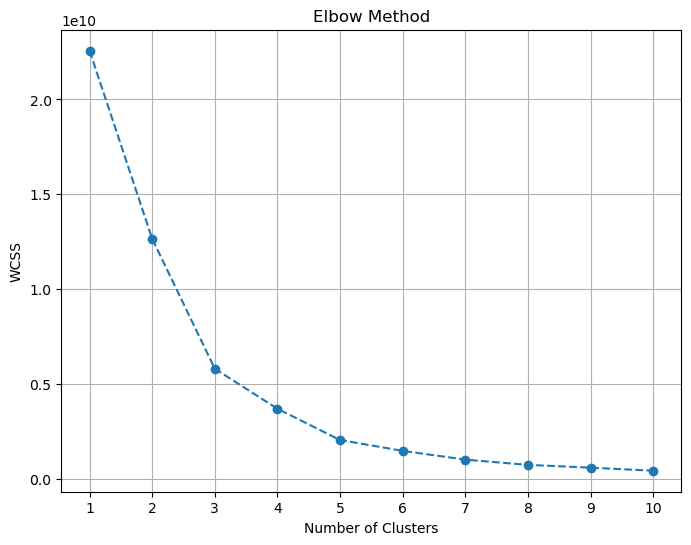

In [13]:
# Extracting relevant features
features = ['Average total income in 2020 among recipients ($)', 
            'Median total income in 2020 among recipients ($)', 
            '2022 Budget',
            'Population density per square kilometre']
elbow_X = demographic_df[features].values 

# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(elbow_X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.savefig("Graphs/Demographic_Elbow.png", bbox_inches='tight')
plt.show()


In [14]:
# Save elbow method data into pickle
elbow_data = {
    'num_clusters': range(1, 11),
    'wcss': wcss 
}
with open('trained_models/elbow_method_data.pkl', 'wb') as f:
    pickle.dump(elbow_data, f)

C:\Users\jason\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


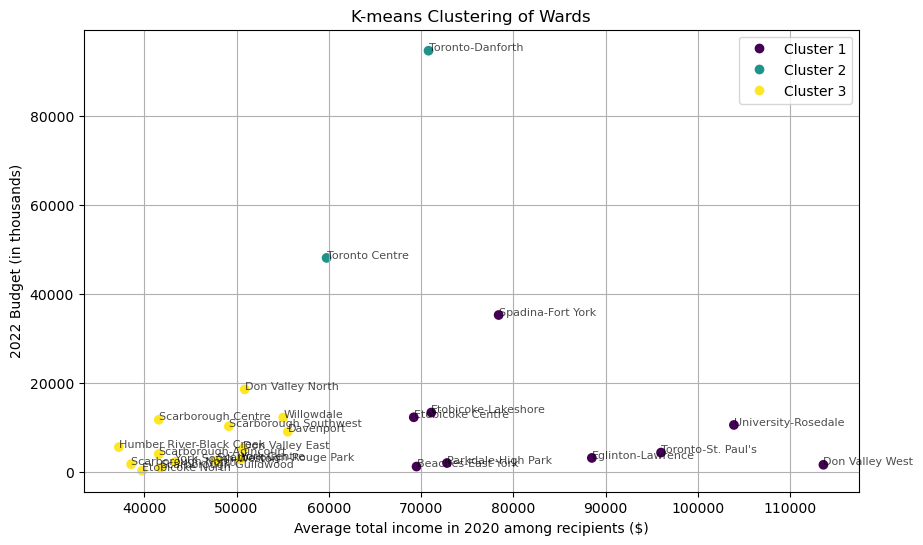

In [15]:
# Select relevant features for clustering
features = ['Average total income in 2020 among recipients ($)', 
            'Median total income in 2020 among recipients ($)', 
            '2022 Budget',
            'Population density per square kilometre']
X = demographic_df[features].values 
    
# Number of clusters
K = 3

# K-means clustering
kmeans = KMeans(n_clusters=K)
kmeans.fit(X)
labels = kmeans.labels_

demographic_df["Cluster"] = labels

plt.figure(figsize=(10, 6))
scatter = plt.scatter(demographic_df["Average total income in 2020 among recipients ($)"], demographic_df["2022 Budget"], c=labels, cmap='viridis')
plt.title('K-means Clustering of Wards')
plt.xlabel('Average total income in 2020 among recipients ($)')
plt.ylabel('2022 Budget (in thousands)')
plt.grid(True)

# Create custom legend
legend_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

# Annotate wards
for i, ward in enumerate(demographic_df["Ward"]):
    plt.annotate(ward, (demographic_df["Average total income in 2020 among recipients ($)"][i], demographic_df["2022 Budget"][i]), fontsize=8, alpha=0.7)

plt.savefig("Graphs/Demographic_clustering.png", bbox_inches='tight')

plt.show()






In [19]:
# Save the necessary objects to a .pkl file
with open('trained_models/K-means_clustering.pkl', 'wb') as f:
    pickle.dump((demographic_df, kmeans), f)
